In [2]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid, zero
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()


In [3]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Actual Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title("Rollout")
  plt.show()

In [4]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=True)
controller0 = zero.Controller()
controller1 = pid.Controller()

In [5]:
sim0 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller0, debug=False)
sim0.rollout()
sim1 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller1, debug=False)
sim1.rollout()

{'lataccel_cost': 1.4846642894785849,
 'jerk_cost': 30.653904957486223,
 'total_cost': 104.88711943141546}

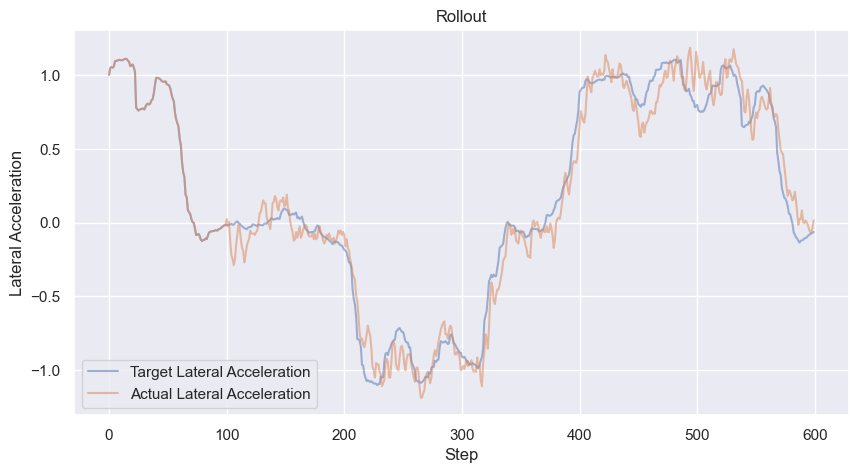

In [6]:
plot_rollout(sim1)

{'lataccel_cost': 1.0285167465128295, 'jerk_cost': 30.8430970271457, 'total_cost': 82.26893435278717}


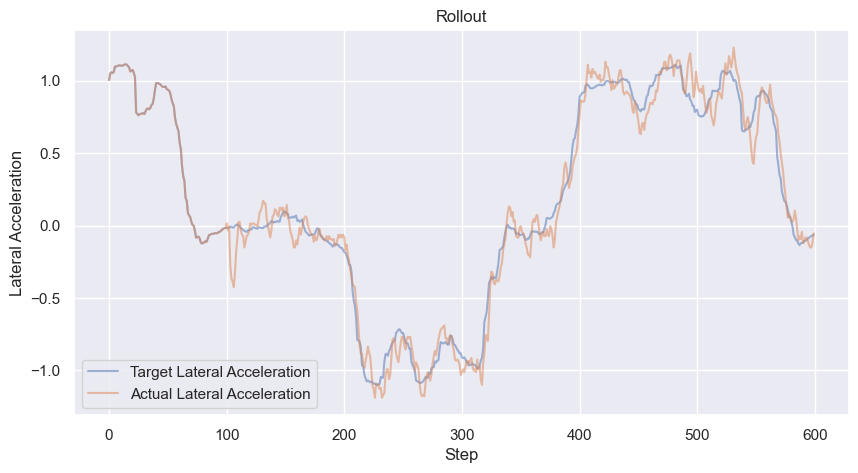

In [7]:
# controller2 = pid.PIDController(p=0.12, i=0.115, d=-0.04, scale=1, imax=1)
controller2 = pid.PIDController(p=0.12, i=0.115, d=0.005, scale=1, imax=1)
sim2 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller2, debug=False)
print(sim2.rollout())
plot_rollout(sim2)

{'lataccel_cost': 1.0206694864978472, 'jerk_cost': 30.83830735449609, 'total_cost': 81.87178167938845}


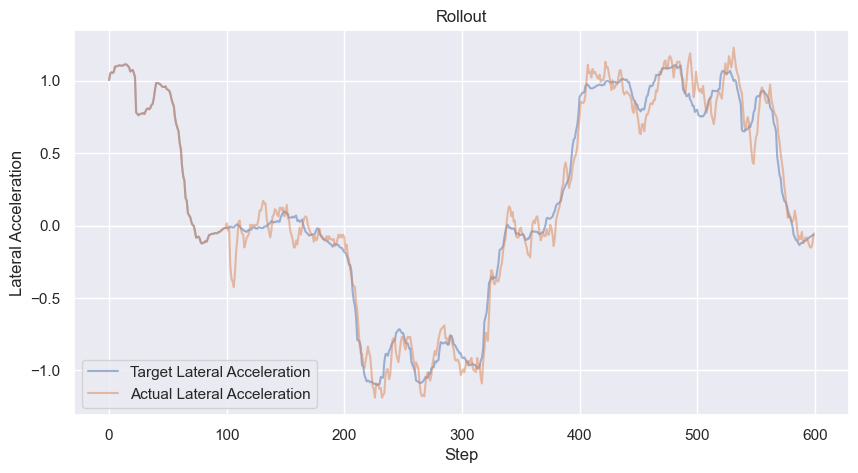

In [11]:
controller3 = pid.PID4Controller(p=0.12, i=0.115, d=0.005, d2=-0.0008, scale=1, imax=1)
sim3 = TinyPhysicsSimulator(model, "./data/00000.csv", controller=controller3, debug=False)
print(sim3.rollout())
plot_rollout(sim3)
